# Modelado: XGBOOST


### Carga de librerías

In [1]:
import pandas as pd
import numpy as np
# Import mlflow for models tracking
import mlflow
# Libraries for models and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, f1_score, precision_score, recall_score
import xgboost as xgb
# Visualization libraries
import matplotlib.pyplot as plt

# Packages to manage class imbalance
from collections import Counter
from imblearn.over_sampling import SMOTE


### Carga de ficheros

In [2]:
df = pd.read_csv("../../data/final/df_train_final.csv")
df.head(5)

,TARGET,DAYS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,QTY_APP_LAST_YEAR,RATIO_NONAPPROVED
0,1,-9461,0.139376,0.083037,0.262949,1.0,0.0
1,0,-16765,0.507626,0.311267,0.622246,0.0,0.0
2,0,-13778,0.492060,0.774761,0.724000,1.0,0.0
3,0,-10197,0.363945,0.319760,0.651862,0.0,0.0
4,0,-13439,0.176653,0.464831,0.715042,4.0,0.0


In [3]:
df_all = pd.read_csv("../../data/final/df_train_final_all.csv")
df_all.head(5)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130.0,-1213.0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,112500.0,652500.0,21177.0,652500.0,0.022800,-10197,-679.0,-4427.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,67500.0,80865.0,5881.5,67500.0,0.031329,-13439,-2717.0,-311.0,...,0,0,0,0,0,0,0,0,1,0


### Dataset final

#### Preparación datasets train and test

In [4]:
# Separate TARGET variable from dependent variables
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Divide dataset in train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Generate expermient tracking in MLflow
exp_name = 'Model XGBoost'
exp_id = mlflow.create_experiment(name=exp_name)

#### Prueba Nro. 1

In [5]:
# Track each run
with mlflow.start_run(experiment_id=exp_id, run_name="XGBoost - mlogloss"):
    # Create and train XGBoost model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    trained_model = model.fit(X_train, y_train)

    # Evaluate predictions in test dataset of positive class to calculate AUC
    y_pred_auc = trained_model.predict_proba(X_test)[:, 1]
    # Evaluate model for accuracy metric
    y_pred = trained_model.predict(X_test)

    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred_auc)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)


    # Track evaluation metric used for the model
    mlflow.log_param('eval_metric', 'logloss')

    # Track metrics
    mlflow.log_metric('roc_auc_score', auc_score)
    mlflow.log_metric('accuracy_score', accuracy)
    mlflow.log_metric('precision_score', precision)
    mlflow.log_metric('recall_score', recall)
    mlflow.log_metric('f1_score', f1)

    # Save model
    mlflow.sklearn.log_model(trained_model, "XGBoost - logloss")

    # Close MLflow tracking
    mlflow.end_run()

print(f"AUC: {auc_score:.4f}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

c:\Users\elisa\OneDrive\MÁSTER\TFM\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:28:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC: 0.7195
Accuracy: 92.58%
Precision: 0.4500
Recall: 0.0164
F1-Score: 0.0317
Confusion Matrix:
[[54739    88]
 [ 4306    72]]


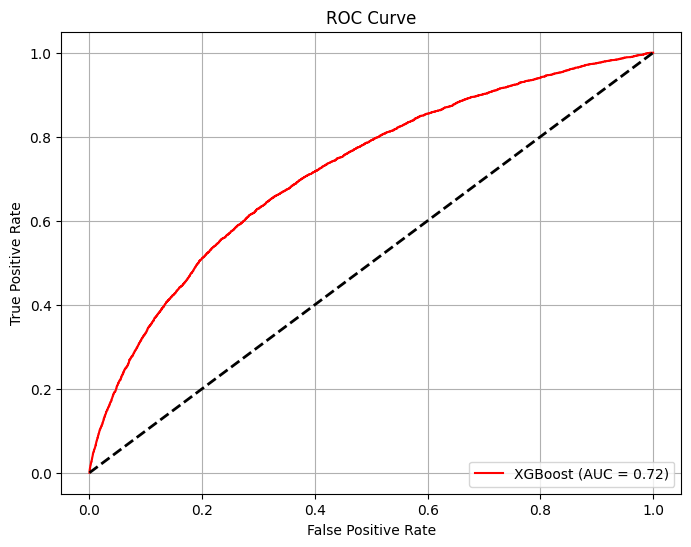

In [6]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_auc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc_score:.2f})", color='red')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

El valor AUC es 0.5074, lo cual indica que el rendimiento del modelo es aleatorio. No obstante, la precisión (accurracy) es muy cercana a 1. Esto puede ser causado por tener clases desbalanceadas o que el modelo esté sesgado hacia la clase mayoritaria.

In [7]:
df_grouped_target= df.groupby('TARGET').size().reset_index(name='COUNT')
df_grouped_target

,TARGET,COUNT
0,0,182905
1,1,14442


<Axes: xlabel='TARGET'>

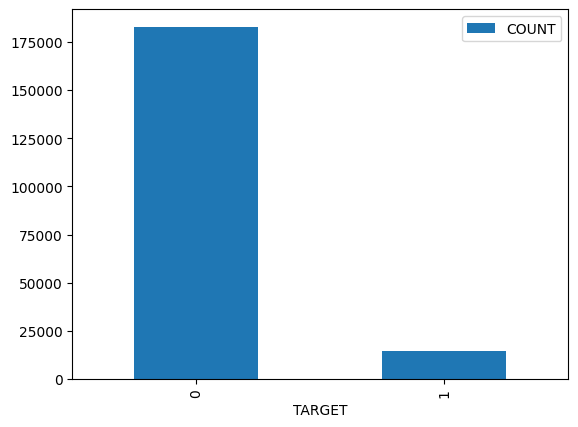

In [13]:
# Plotting a bar plot for TARGET
#plt.bar(df_grouped_target['TARGET'], df_grouped_target['COUNT'],  color='skyblue', edgecolor='black')
df_grouped_target.plot.bar(x='TARGET', y='COUNT') 
# Adding labels and title
#plt.xlabel('Target Values')
#plt.ylabel('Count')
#plt.title('Distribution of TARGET class')
 
# Display the plot
#plt.show()

In [15]:
percentage_1=round(100*df_grouped_target[df_grouped_target['TARGET']==1]['COUNT'].values[0]/len(df),2)
print(f"La clase 1 representa un {percentage_1}% de la muestra.")

La clase 1 representa un 7.32% de la muestra.


#### Prueba Nro. 2 

Tratando el desbalanceo de clases. Se uttiliza el hiperparametro scale_pos_weight para ajustar el peso de las clases

In [16]:
# Track each run
with mlflow.start_run(experiment_id=exp_id, run_name="XGBoost - class weigthing"):

    # Count classes distribution 
    class_distr = Counter(y)
    # Adjust weights to minority class
    scale_pos_weight = class_distr[0] / class_distr[1]

    # Create and train XGBoost model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
    trained_model = model.fit(X_train, y_train)

    # Evaluate predictions in test dataset of positive class to calculate AUC
    y_pred_auc = trained_model.predict_proba(X_test)[:, 1]
    # Evaluate model for accuracy metric
    y_pred = trained_model.predict(X_test)

    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred_auc)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)


    # Track evaluation metric used for the model
    mlflow.log_param('eval_metric', 'logloss')
    mlflow.log_param('scale_pos_weight', scale_pos_weight)

    # Track metrics
    mlflow.log_metric('roc_auc_score', auc_score)
    mlflow.log_metric('accuracy_score', accuracy)
    mlflow.log_metric('precision_score', precision)
    mlflow.log_metric('recall_score', recall)
    mlflow.log_metric('f1_score', f1)

    # Save model
    mlflow.sklearn.log_model(trained_model, "XGBoost - logloss")

    # Close MLflow tracking
    mlflow.end_run()

print(f"scale_pos_weight: {scale_pos_weight}")
print(f"AUC: {auc_score:.4f}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

c:\Users\elisa\OneDrive\MÁSTER\TFM\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:35:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


scale_pos_weight: 12.664797119512533
AUC: 0.7096
Accuracy: 71.92%
Precision: 0.1447
Recall: 0.5697
F1-Score: 0.2308
Confusion Matrix:
[[40086 14741]
 [ 1884  2494]]


El AUC se ha incrementado a un valor de 0.65, lo que indica que el modelo tiene un rendimiento moderado. El ajuste del peso de las clases ha contribuido significativamente al rendimiento del modelo

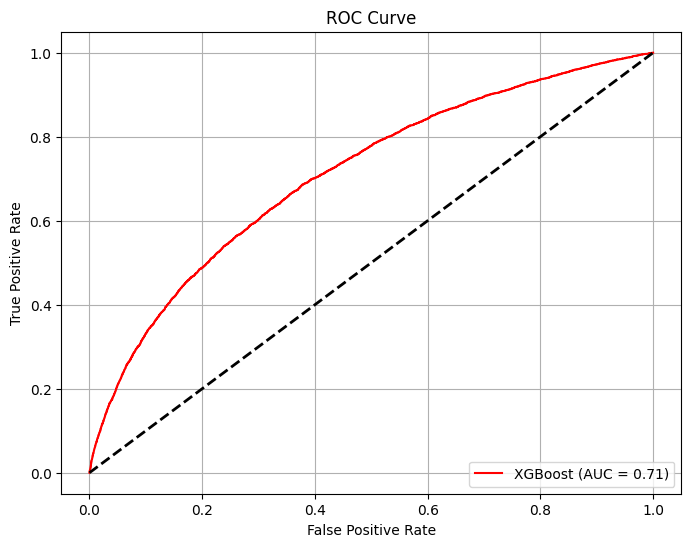

In [17]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_auc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc_score:.2f})", color='red')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Prueba Nro. 3

Tratando el desbalanceo de clases con SMOTE.

In [18]:
# Track each run
with mlflow.start_run(experiment_id=exp_id, run_name="XGBoost - SMOTE"):

    # Original class distribution
    print(f"Original class distribution: {np.bincount(y)}")

    # Apply SMOTE to create synthetic instances for the minority class
    smote = SMOTE(random_state=42)
   
    # Create train and test based on SMOTE sample to avoid overfitting on test sample
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # SMOTE class distribution
    print(f"SMOTE class distribution: {np.bincount(y_train_smote)}")

    # Create and train XGBoost model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    trained_model = model.fit(X_train_smote, y_train_smote )

    # Evaluate predictions in test dataset of positive class to calculate AUC
    y_pred_auc = trained_model.predict_proba(X_test)[:, 1]
    # Evaluate model for accuracy metric
    y_pred = trained_model.predict(X_test)

    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred_auc)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)


    # Track evaluation metric used for the model
    mlflow.log_param('eval_metric', 'logloss')

    # Track metrics
    mlflow.log_metric('roc_auc_score', auc_score)
    mlflow.log_metric('accuracy_score', accuracy)
    mlflow.log_metric('precision_score', precision)
    mlflow.log_metric('recall_score', recall)
    mlflow.log_metric('f1_score', f1)

    # Save model
    mlflow.sklearn.log_model(trained_model, "XGBoost - logloss")

    # Close MLflow tracking
    mlflow.end_run()

print(f"AUC: {auc_score:.4f}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Original class distribution: [182905  14442]
SMOTE class distribution: [128078 128078]


c:\Users\elisa\OneDrive\MÁSTER\TFM\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:37:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC: 0.6674
Accuracy: 88.02%
Precision: 0.1426
Recall: 0.1238
F1-Score: 0.1325
Confusion Matrix:
[[51568  3259]
 [ 3836   542]]


### Dataset final con todos los atributos

#### Preparación datasets train and test

In [19]:
# Separate TARGET variable from dependent variables
X = df_all.drop('TARGET', axis=1)
y = df_all['TARGET']

# Divide dataset in train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Generate expermient tracking in MLflow
exp_name = 'Model XGBoost - dataset all'
exp_id = mlflow.create_experiment(name=exp_name)

#### Prueba No.1

In [13]:
np.bincount(y_train)

array([128078,  10064], dtype=int64)

Las clases están desbalanceadas. Ejecutamos el modelo con asignación de pesos a la clase minoritaria

In [20]:
# Track each run
with mlflow.start_run(experiment_id=exp_id, run_name="XGBoost - class weighting"):

    # Count classes distribution 
    class_distr = Counter(y)
    # Adjust weights to minority class
    scale_pos_weight = class_distr[0] / class_distr[1]

    # Create and train XGBoost model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
    trained_model = model.fit(X_train, y_train)

    # Evaluate predictions in test dataset of positive class to calculate AUC
    y_pred_auc = trained_model.predict_proba(X_test)[:, 1]
    # Evaluate model for accuracy metric
    y_pred = trained_model.predict(X_test)

    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred_auc)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)


    # Track evaluation metric used for the model
    mlflow.log_param('eval_metric', 'logloss')
    mlflow.log_param('scale_pos_weight', scale_pos_weight)

    # Track metrics
    mlflow.log_metric('roc_auc_score', auc_score)
    mlflow.log_metric('accuracy_score', accuracy)
    mlflow.log_metric('precision_score', precision)
    mlflow.log_metric('recall_score', recall)
    mlflow.log_metric('f1_score', f1)

    # Save model
    mlflow.sklearn.log_model(trained_model, "XGBoost - logloss")

    # Close MLflow tracking
    mlflow.end_run()

print(f"scale_pos_weight: {scale_pos_weight}")
print(f"AUC: {auc_score:.4f}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

c:\Users\elisa\OneDrive\MÁSTER\TFM\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:37:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


scale_pos_weight: 12.664797119512533
AUC: 0.7351
Accuracy: 77.25%
Precision: 0.1712
Recall: 0.5407
F1-Score: 0.2600
Confusion Matrix:
[[43366 11461]
 [ 2011  2367]]
